In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
a=pd.read_csv('Apps_data+(1).csv')


In [4]:
a.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# 2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.
a.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9826,HBO NOW: Stream TV & Movies,FAMILY,3.9,61230,Varies with device,"10,000,000+",Free,0,Teen,Entertainment,"July 19, 2018",Varies with device,Varies with device
8723,DRAGON QUEST,FAMILY,4.2,9659,30M,"100,000+",Paid,$2.99,Everyone,Role Playing,"March 10, 2017",1.0.7,2.3 and up
8910,Upgrade for Android DU Master,TOOLS,3.6,12993,5.2M,"1,000,000+",Free,0,Everyone,Tools,"January 9, 2017",1.3.0,2.3.3 and up
3397,Freeme Launcher—Stylish Theme,PERSONALIZATION,4.1,2828,7.4M,"100,000+",Free,0,Everyone,Personalization,"January 22, 2017",2.11.5,4.1 and up
2171,All-in-One Mahjong 3,FAMILY,4.4,38,16M,100+,Paid,$0.99,Everyone,Board;Brain Games,"June 14, 2018",20180609,4.0 and up


In [5]:
# 3) Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.
a.describe()
#In this data there is 9367 non-null values in the "Rating" column, which is the only numeric column in the Play Store app data. 
#The mean rating is 4.19, with a standard deviation of 0.537.
#The minimum rating is 1.0 and the maximum rating is 19.

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
a.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [7]:
# 4) Check if there are any duplicate records in the dataset? if any drop them.
a.duplicated().sum() #total count 0f duplicate records in this dataset has 483

483

In [8]:
a.drop_duplicates(inplace=True)
#removing the duplicate records in a dataset by using drop_duplicates() ang giving inplace =True for remove permenantly

In [9]:
# 5) Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.
a['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
a['Category']=a['Category'].replace('1.9',np.nan)

In [11]:
a=a.dropna(subset=['Category'])

In [12]:
a.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [13]:
a['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [14]:
# 6) Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)
a['Rating'].isnull().sum()

1465

In [16]:
a.dropna(subset=['Rating'],inplace=True)

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\4022919012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.dropna(subset=['Rating'],inplace=True)


In [17]:
a['Rating'].isnull().sum()


0

In [18]:
a['Rating_category']=a['Rating'].apply(lambda i: 'High' if i>3.5 else 'low')

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\1025316724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Rating_category']=a['Rating'].apply(lambda i: 'High' if i>3.5 else 'low')


In [19]:
a


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


In [20]:
a['Rating_category'].unique()

array(['High', 'low'], dtype=object)

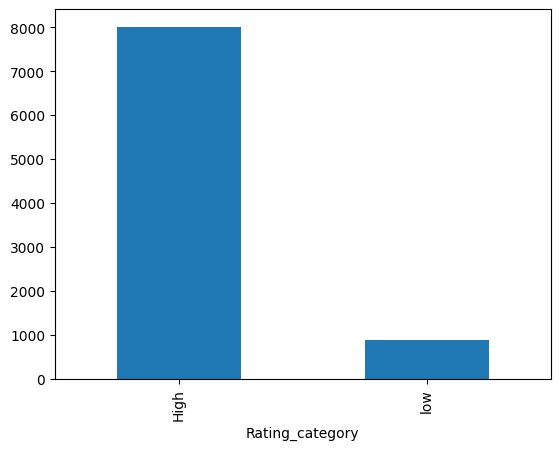

In [21]:
# 7) Check the distribution of the newly created column 'Rating_category' and comment on the distribution.
a['Rating_category'].value_counts().plot(kind='bar');
#the rating_category of value >3.5 has the highest amount of counts than the <3.5
#majority of the apps in the datset has more than 3.5 ratngs

In [22]:
# 8) Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)
a["Reviews"]=pd.to_numeric(a['Reviews'],errors='coerce') #changing reviews columns as object to numeric

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\2625771050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Reviews"]=pd.to_numeric(a['Reviews'],errors='coerce') #changing reviews columns as object to numeric


In [23]:
a['Reviews_log'] = np.log1p(a['Reviews']) #using log transform we are handling the ouliers in the columns

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\360472142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Reviews_log'] = np.log1p(a['Reviews']) #using log transform we are handling the ouliers in the columns


<Axes: >

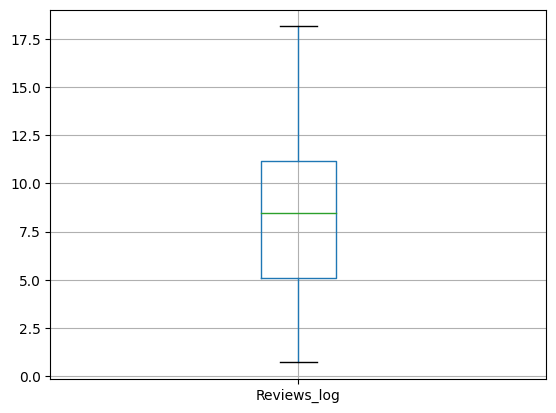

In [24]:
a.boxplot(column='Reviews_log')

In [25]:
# 9) The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. 
# (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')
a['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [26]:
a['Size']=a['Size'].replace('Varies with device',np.nan)

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\4235505285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Size']=a['Size'].replace('Varies with device',np.nan)


In [27]:
a=a.dropna(subset=['Size'])

In [28]:
a.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        4
Android Ver        2
Rating_category    0
Reviews_log        0
dtype: int64

In [29]:
a['Size'].str[-1].unique()

array(['M', 'k'], dtype=object)

In [30]:
a['Size']=a['Size'].replace({'M':'*10**6','K':'*10**3','k':'*10**3'},regex=True)

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\491436867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Size']=a['Size'].replace({'M':'*10**6','K':'*10**3','k':'*10**3'},regex=True)


In [31]:
a['Size']=a['Size'][a['Size'].isnull()==False].map(pd.eval)
#eval() function is used to perform various operations on the dataframe columns, such as arithmetic operations, logical operations, and string operations

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\2961814332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Size']=a['Size'][a['Size'].isnull()==False].map(pd.eval)


In [32]:
a['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10833      619000.0
10834     2600000.0
10836    53000000.0
10837     3600000.0
10840    19000000.0
Name: Size, Length: 7424, dtype: float64

In [33]:
a['Size'].dtype


dtype('float64')

In [34]:
# 10) Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.
a['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [35]:
a['Installs']=a['Installs'].str.replace(',','')

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\2172586882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Installs']=a['Installs'].str.replace(',','')


In [36]:
a['Installs']=a['Installs'].str.replace('+','')

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\875507341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Installs']=a['Installs'].str.replace('+','')


In [37]:
a['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: object

In [38]:
# 11) Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.
a['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [39]:
a['Price']=a['Price'].str.replace('$',"")

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\4023241398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Price']=a['Price'].str.replace('$',"")


In [40]:
a['Price'] = pd.to_numeric(a['Price'])

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\1764189139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Price'] = pd.to_numeric(a['Price'])


In [41]:
a['Price'].dtype

dtype('float64')

In [42]:
# 12)  Drop the columns which you think redundant for the analysis.
#(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
#'Current Ver','Android Ver' columns since which are redundant for our analysis
a

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,6.875232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High,3.806662
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High,2.079442
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High,3.663562
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High,1.609438


In [43]:
a.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

C:\Users\harih\AppData\Local\Temp\ipykernel_18020\212742183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)


In [44]:
a

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,High,5.075174
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,High,6.875232
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,High,11.379520
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,High,12.281389
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,High,6.875232
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,44,619000.0,1000,Free,0.0,Everyone,High,3.806662
10834,FAMILY,7,2600000.0,500,Free,0.0,Everyone,High,2.079442
10836,FAMILY,38,53000000.0,5000,Free,0.0,Everyone,High,3.663562
10837,FAMILY,4,3600000.0,100,Free,0.0,Everyone,High,1.609438


In [45]:
a.to_csv('app_data_modified.csv')

In [46]:
# 13) Encode the categorical columns.
le_category_columns=['Category','Type','Content Rating','Rating_category']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in le_category_columns:
    app_data[i]=le.fit_transform(app_data[i])

C:\Users\harih\AppData\Local\Temp\ipykernel_13548\2828661068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_data[i]=le.fit_transform(app_data[i])
C:\Users\harih\AppData\Local\Temp\ipykernel_13548\2828661068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_data[i]=le.fit_transform(app_data[i])
C:\Users\harih\AppData\Local\Temp\ipykernel_13548\2828661068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [46]:
a_final=a.sample(10)
a_final

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
7985,TOOLS,54,22000000.0,5000,Free,0.0,Everyone,High,4.007333
2514,MEDICAL,27,15000000.0,5000,Free,0.0,Everyone,High,3.332205
4401,GAME,30630,17000000.0,1000000,Free,0.0,Everyone,High,10.329768
10288,FINANCE,175,12000000.0,1000,Free,0.0,Everyone,High,5.170484
1187,FOOD_AND_DRINK,3320,8400000.0,500000,Free,0.0,Everyone,High,8.108021
2039,FAMILY,7320,10000000.0,1000000,Free,0.0,Everyone,High,8.898502
2426,MEDICAL,9,2900000.0,500,Free,0.0,Everyone,High,2.302585
789,EDUCATION,32380,10000000.0,1000000,Free,0.0,Everyone 10+,High,10.385327
10766,TOOLS,452,7000000.0,100000,Free,0.0,Everyone,low,6.115892
5158,GAME,1088,86000000.0,100000,Free,0.0,Teen,High,6.993015


In [47]:
# 14) Segregate the target and independent features (Hint: Use Rating_category as the target)
y=a[['Rating_category']] #keeping rating_category as y
X=a.drop(columns='Rating_category') #keeping other columns as x except rating_category column

In [48]:
X.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Reviews_log
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,5.075174
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,6.875232
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,11.379520
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,12.281389
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,6.875232


In [49]:
y.head()

,Rating_category
0,High
1,High
2,High
3,High
4,High


In [50]:
# 15) Split the dataset into train and test.
from sklearn.model_selection import train_test_split
model=train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.25,random_state=555)

In [51]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((5568, 8), (1856, 8), (5568, 1), (1856, 1))

In [52]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Reviews_log
6748,FAMILY,1895,72000000.0,50000,Free,0.0,Everyone,7.547502
10219,BUSINESS,27,18000000.0,5000,Free,0.0,Everyone,3.332205
2791,SHOPPING,35497,16000000.0,1000000,Free,0.0,Everyone,10.477232
3497,PRODUCTIVITY,6011,4300000.0,500000,Free,0.0,Everyone,8.701513
5225,FAMILY,1564,35000000.0,50000,Free,0.0,Everyone,7.355641
...,...,...,...,...,...,...,...,...
6988,FAMILY,513,9800000.0,50000,Free,0.0,Everyone,6.242223
5542,HOUSE_AND_HOME,118,72000000.0,50000,Free,0.0,Everyone,4.779123
9387,FAMILY,3593,19000000.0,500000,Free,0.0,Everyone,8.187021
4943,PRODUCTIVITY,5107,1400000.0,500000,Free,0.0,Everyone,8.538563


In [53]:
y_train

,Rating_category
6748,High
10219,High
2791,High
3497,High
5225,High
...,...
6988,High
5542,High
9387,High
4943,High


In [54]:
X_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Reviews_log
7924,FINANCE,4290,24000000.0,50000,Free,0.0,Everyone,8.364275
10771,PRODUCTIVITY,17,2400000.0,1000,Free,0.0,Everyone,2.890372
10755,MAPS_AND_NAVIGATION,334,676000.0,10000,Free,0.0,Everyone,5.814131
5543,SHOPPING,20247,47000000.0,5000000,Free,0.0,Everyone,9.915811
153,BOOKS_AND_REFERENCE,90468,5900000.0,5000000,Free,0.0,Everyone,11.412763
...,...,...,...,...,...,...,...,...
4198,COMMUNICATION,15439,2200000.0,1000000,Free,0.0,Everyone,9.644717
1719,GAME,59854,7800000.0,5000000,Free,0.0,Everyone,10.999680
10408,GAME,320334,27000000.0,50000000,Free,0.0,Teen,12.677123
7147,SOCIAL,5,1800000.0,5,Free,0.0,Everyone,1.791759


In [55]:
y_test

,Rating_category
7924,High
10771,High
10755,High
5543,High
153,High
...,...
4198,High
1719,High
10408,High
7147,High


In [56]:
# 16) Standardize the data, so that the values are within a particular range.
app_data1=pd.read_csv('app_data_modified.csv')

In [57]:
app_data1

,Unnamed: 0,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,High,5.075174
1,1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,High,6.875232
2,2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,High,11.379520
3,3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,High,12.281389
4,4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,High,6.875232
...,...,...,...,...,...,...,...,...,...,...
7419,10833,BOOKS_AND_REFERENCE,44,619000.0,1000,Free,0.0,Everyone,High,3.806662
7420,10834,FAMILY,7,2600000.0,500,Free,0.0,Everyone,High,2.079442
7421,10836,FAMILY,38,53000000.0,5000,Free,0.0,Everyone,High,3.663562
7422,10837,FAMILY,4,3600000.0,100,Free,0.0,Everyone,High,1.609438


In [59]:
app_data1=app_data1.drop(columns="Unnamed: 0")

In [60]:
app_data1

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,High,5.075174
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,High,6.875232
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,High,11.379520
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,High,12.281389
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,High,6.875232
...,...,...,...,...,...,...,...,...,...
7419,BOOKS_AND_REFERENCE,44,619000.0,1000,Free,0.0,Everyone,High,3.806662
7420,FAMILY,7,2600000.0,500,Free,0.0,Everyone,High,2.079442
7421,FAMILY,38,53000000.0,5000,Free,0.0,Everyone,High,3.663562
7422,FAMILY,4,3600000.0,100,Free,0.0,Everyone,High,1.609438


In [61]:
app_data1.dtypes

Category            object
Reviews              int64
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Rating_category     object
Reviews_log        float64
dtype: object

In [62]:
cols_to_std=['Reviews','Size','Installs','Price','Reviews_log']

In [63]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(app_data1[cols_to_std])

StandardScaler()

In [64]:
app_data1[cols_to_std]=ss.transform(app_data1[cols_to_std])

In [65]:
app_data1[cols_to_std]

,Reviews,Size,Installs,Price,Reviews_log
0,-0.159802,-0.159928,-0.168764,-0.063058,-0.694347
1,-0.159338,-0.373300,-0.158181,-0.063058,-0.206386
2,-0.109701,-0.599475,-0.060990,-0.063058,1.014637
3,-0.036209,0.096119,0.910911,-0.063058,1.259116
4,-0.159338,-0.851254,-0.166820,-0.063058,-0.206386
...,...,...,...,...,...
7419,-0.159868,-0.944327,-0.168958,-0.063058,-1.038215
7420,-0.159889,-0.859789,-0.168969,-0.063058,-1.506431
7421,-0.159871,1.291004,-0.168872,-0.063058,-1.077007
7422,-0.159891,-0.817115,-0.168977,-0.063058,-1.633839


In [66]:
z=(app_data1[cols_to_std]-app_data1[cols_to_std].mean())/app_data1[cols_to_std].std()
z

,Reviews,Size,Installs,Price,Reviews_log
0,-0.159791,-0.159917,-0.168752,-0.063054,-0.694300
1,-0.159328,-0.373275,-0.158170,-0.063054,-0.206373
2,-0.109694,-0.599434,-0.060986,-0.063054,1.014569
3,-0.036206,0.096113,0.910850,-0.063054,1.259031
4,-0.159328,-0.851197,-0.166808,-0.063054,-0.206373
...,...,...,...,...,...
7419,-0.159857,-0.944264,-0.168947,-0.063054,-1.038145
7420,-0.159878,-0.859731,-0.168957,-0.063054,-1.506329
7421,-0.159860,1.290917,-0.168860,-0.063054,-1.076934
7422,-0.159880,-0.817060,-0.168966,-0.063054,-1.633729
